In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('1. Regression - Module - (Housing Prices).csv')

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
# data['Zipcode'].unique().value_counts()
data['Zipcode'].nunique()

70

In [5]:
data['Sale Price'].mean()

540198.4357443658

In [6]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [13]:
data['condition_sale']=0

for i in data['Condition of the House']:
    data['condition_sale'][data['Condition of the House']== i] = data['Sale Price'][data['Condition of the House']== i].mean()
# print(data['condition_sale'].unique())

<BarContainer object of 5 artists>

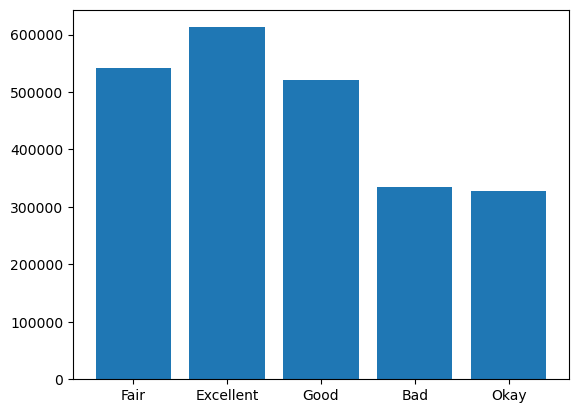

In [12]:
plt.bar(data['Condition of the House'].unique(), data['condition_sale'].unique())

In [31]:
for i in data['Condition of the House'].unique():
    for j in data['Zipcode'].unique():
        print(i,j)

Fair 98178.0
Fair 98125.0
Fair 98028.0
Fair 98136.0
Fair 98074.0
Fair 98053.0
Fair 98003.0
Fair 98198.0
Fair 98146.0
Fair 98038.0
Fair 98007.0
Fair 98115.0
Fair 98107.0
Fair 98126.0
Fair 98019.0
Fair 98103.0
Fair 98002.0
Fair 98133.0
Fair 98040.0
Fair 98092.0
Fair 98030.0
Fair 98119.0
Fair 98112.0
Fair 98052.0
Fair 98027.0
Fair 98117.0
Fair 98058.0
Fair 98001.0
Fair 98056.0
Fair 98166.0
Fair 98023.0
Fair 98070.0
Fair 98148.0
Fair 98105.0
Fair 98042.0
Fair 98008.0
Fair 98059.0
Fair 98122.0
Fair 98144.0
Fair 98004.0
Fair 98005.0
Fair 98034.0
Fair 98075.0
Fair 98116.0
Fair 98010.0
Fair 98118.0
Fair 98199.0
Fair 98032.0
Fair 98045.0
Fair 98102.0
Fair 98077.0
Fair 98108.0
Fair 98168.0
Fair 98177.0
Fair 98065.0
Fair 98029.0
Fair 98006.0
Fair 98109.0
Fair 98022.0
Fair 98033.0
Fair 98155.0
Fair 98024.0
Fair 98011.0
Fair 98031.0
Fair 98106.0
Fair 98072.0
Fair 98188.0
Fair 98014.0
Fair 98055.0
Fair nan
Fair 98039.0
Excellent 98178.0
Excellent 98125.0
Excellent 98028.0
Excellent 98136.0
Excellent

In [38]:
combination_counts = data.groupby(['Condition of the House', 'Zipcode']).size().reset_index(name='Count')
print(combination_counts)

    Condition of the House  Zipcode  Count
0                      Bad  98004.0      1
1                      Bad  98006.0      2
2                      Bad  98011.0      1
3                      Bad  98023.0      1
4                      Bad  98024.0      1
..                     ...      ...    ...
278                   Okay  98155.0      3
279                   Okay  98166.0      6
280                   Okay  98168.0      9
281                   Okay  98178.0      2
282                   Okay  98198.0      4

[283 rows x 3 columns]


In [6]:
#Initialising a new column
data['condition_sale'] = 0

# Calculating mean based on the condition of the House
for i in data['Condition of the House'].unique():
  data['condition_sale'][data['Condition of the House'] == str(i)] = data['Sale Price'][data['Condition of the House'] == str(i)].mean()

data['condition_sale'].unique()

array([542130.61120616, 612577.74250441, 521277.5105671 , 334431.66666667,
       327316.21511628])

In [7]:
import time
#Initialising a new column
data['zip_condition_sale'] = 0

C = 'Condition of the House'
Z = "Zipcode"

tick = time.time()
# Calculating mean based on the condition of the House and zipcode
for i in data[C].unique():
  for j in data[Z].unique() :
    data['zip_condition_sale'][(data[C] == str(i)) & (data[Z] == j) ] = data['Sale Price'][(data[C] == str(i)) & (data[Z] == j)].mean()
tock = time.time()
time1 = tock - tick
len(data['zip_condition_sale'].unique())

281

In [8]:
zip_condition_sale2  = pd.pivot_table(data, index=["Condition of the House","Zipcode"], values=["Sale Price"], aggfunc=np.mean,)
zip_condition_sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
                       98028.0  1.960000e+05
                       98033.0  5.350000e+05
                       98052.0  5.500000e+05
                       98058.0  1.900000e+05
                       98065.0  2.350000e+05
                       98103.0  3.529500e+05
                       98106.0  1.250000e+05
                       98112.0  4.270000e+05
                       98116.0  1.973333e+05
                       98117.0  1.250000e+05
                       98118.0  2.270000e+05
                       98122.0  4.828333e+05
                       98126.0  2.950000e+05
                       98136.0  6.580000e+05
                       98146.0  2.550000e+05
                       98148.0  2.752500e+05
                       98155.0  3.050000e+05
                       98168.0  7.950000e+04
Excellent              98001.0  2.425433e+05
                       98002.0  2.216411e+05
                       98003.0  3.706800e+05
                       98004.0  1.236365e+06
                       98005.0  8.319500e+05
                       98006.0  8.064050e+05
                       98007.0  6.974750e+05
...                                      ...
Okay                   98056.0  2.775000e+05
                       98058.0  2.338335e+05
                       98059.0  2.613500e+05
                       98065.0  3.050000e+05
                       98070.0  2.226250e+05
                       98074.0  3.924833e+05
                       98077.0  2.500000e+05
                       98092.0  2.733333e+05
                       98103.0  4.269440e+05
                       98105.0  2.560000e+06
                       98106.0  2.146667e+05
                       98107.0  6.680000e+05
                       98108.0  2.949750e+05
                       98112.0  5.275000e+05
                       98115.0  4.244167e+05
                       98116.0  3.937500e+05
                       98117.0  4.040000e+05
                       98118.0  2.467497e+05
                       98122.0  4.310000e+05
                       98125.0  3.474900e+05
                       98126.0  3.055000e+05
                       98136.0  2.733333e+05
                       98144.0  3.021550e+05
                       98146.0  2.241111e+05
                       98148.0  2.507500e+05
                       98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [9]:
zip_condition_sale3  = pd.pivot_table(data, index=["Zipcode"], columns = ['Condition of the House'], values=["Sale Price"], aggfunc=np.mean)
zip_condition_sale3

Sale Price                ...                            
Condition of the House           Bad     Excellent  ...          Good          Okay
Zipcode                                             ...                            
98001.0                          NaN  2.425433e+05  ...  2.527446e+05  3.560700e+05
98002.0                          NaN  2.216411e+05  ...  2.192858e+05           NaN
98003.0                          NaN  3.706800e+05  ...  2.809591e+05  2.355000e+05
98004.0                 1.500000e+06  1.236365e+06  ...  1.145915e+06  4.250000e+05
98005.0                          NaN  8.319500e+05  ...  7.669397e+05  5.777500e+05
98006.0                 3.725000e+05  8.064050e+05  ...  7.297227e+05  5.475000e+05
98007.0                          NaN  6.974750e+05  ...  5.948187e+05           NaN
98008.0                          NaN  7.319962e+05  ...  5.888774e+05           NaN
98010.0                          NaN  3.195643e+05  ...  3.429075e+05           NaN
98011.0                 2.700000e+05  4.845429e+05  ...  4.617790e+05           NaN
98014.0                          NaN  4.208500e+05  ...  3.838071e+05  2.803500e+05
98019.0                          NaN  2.880000e+05  ...  3.196292e+05  2.472500e+05
98022.0                          NaN  2.728172e+05  ...  3.179756e+05  3.700000e+05
98023.0                 1.500000e+05  2.436938e+05  ...  2.662587e+05  2.268750e+05
98024.0                 1.420000e+05  5.328000e+05  ...  5.214417e+05  2.000000e+05
98027.0                          NaN  5.871450e+05  ...  5.316230e+05  5.200000e+05
98028.0                 1.960000e+05  4.972250e+05  ...  4.550322e+05           NaN
98029.0                          NaN  6.366667e+05  ...  6.104205e+05           NaN
98030.0                          NaN  2.566667e+05  ...  2.696514e+05  2.725000e+05
98031.0                          NaN  2.863050e+05  ...  2.877653e+05           NaN
98032.0                          NaN  2.444562e+05  ...  2.514113e+05           NaN
98033.0                 5.350000e+05  6.807425e+05  ...  6.470055e+05  4.511667e+05
98034.0                          NaN  6.139152e+05  ...  4.918135e+05  7.125000e+05
98038.0                          NaN  3.038300e+05  ...  3.271570e+05           NaN
98039.0                          NaN  1.515000e+06  ...  1.871375e+06           NaN
98040.0                          NaN  1.193426e+06  ...  1.079343e+06  7.115000e+05
98042.0                          NaN  2.391514e+05  ...  3.172984e+05  2.091680e+05
98045.0                          NaN  3.067500e+05  ...  3.263767e+05  2.702000e+05
98052.0                 5.500000e+05  7.739462e+05  ...  5.728418e+05  8.295000e+05
98053.0                          NaN  5.270000e+05  ...  7.694048e+05  1.700000e+05
...                              ...           ...  ...           ...           ...
98092.0                          NaN  2.840690e+05  ...  2.933719e+05  2.733333e+05
98102.0                          NaN  1.370648e+06  ...  1.182517e+06           NaN
98103.0                 3.529500e+05  6.860259e+05  ...  5.834830e+05  4.269440e+05
98105.0                          NaN  1.066282e+06  ...  7.938799e+05  2.560000e+06
98106.0                 1.250000e+05  3.572193e+05  ...  3.294546e+05  2.146667e+05
98107.0                          NaN  6.107357e+05  ...  5.641780e+05  6.680000e+05
98108.0                          NaN  4.270082e+05  ...  3.714949e+05  2.949750e+05
98109.0                          NaN  1.215344e+06  ...  9.817700e+05           NaN
98112.0                 4.270000e+05  1.465875e+06  ...  1.169168e+06  5.275000e+05
98115.0                          NaN  7.145419e+05  ...  6.171771e+05  4.244167e+05
98116.0                 1.973333e+05  6.908222e+05  ...  6.424039e+05  3.937500e+05
98117.0                 1.250000e+05  6.635453e+05  ...  5.720367e+05  4.040000e+05
98118.0                 2.270000e+05  4.332582e+05  ...  4.202014e+05  2.467497e+05
98119.0                          NaN  1.042215e+06  ...  1.028862e+06         

In [42]:
zip_function = pd.pivot_table(data, index = ['Condition of the House', 'Zipcode'], values = ['Sale Price'], aggfunc = np.mean)
zip_function

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [47]:
zip_function = pd.pivot_table(data, index = ['Zipcode'], columns = ['Condition of the House'], values = ['Sale Price'], aggfunc = np.mean)
zip_function

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [10]:
data['plot_length'] = data['Flat Area (in Sqft)']**0.5
data['plot_length'].head()

0    34.351128
1    50.695167
2    27.748874
3    44.271887
4    40.987803
Name: plot_length, dtype: float64

In [0]:
data['new_rank'] = data['Overall Grade']/data['Overall Grade'].sum()

In [12]:
data['total_area'] = data['Flat Area (in Sqft)'] + data['Lot Area (in Sqft)']
data['total_area'].head()

0     6830.0
1     9812.0
2    10770.0
3     6960.0
4     9760.0
Name: total_area, dtype: float64

In [13]:
data['Condition of the House'][data['Condition of the House'] == 'Fair'] = '1'
data['Condition of the House'][data['Condition of the House'] == 'Okay'] = '0'
data['Condition of the House'][data['Condition of the House'] == 'Bad'] = '0'
data['Condition of the House'][data['Condition of the House'] == 'Good'] = '1'
data['Condition of the House'][data['Condition of the House'] == 'Excellent'] = '3'
data['Condition of the House'].unique()

array(['1', '3', '0'], dtype=object)

In [48]:
data['Condition of the House'] = data['Condition of the House'].map({'Good':'1',
                                                                     'Excellent':'3',
                                                                     'Bad':'0',
                                                                     'Fair': '1',
                                                                     'Okay': '0'})
data['Condition of the House'].unique()

# data['Condition of the House'] = data['Condition of the House'].map({'Good':'1',
#                                                                      'Excellent':'3',
#                                                                      'Bad':'0',
#                                                                      'Fair':'1',
#                                                                      'Okay':'0'})

array(['1', '3', '0'], dtype=object)

In [91]:
# print(len(data['Condition of the House'].unique()))

data['year'] = 0

lenth = len(data['Date House was Sold'])

for i in range (lenth):
    data['year'][i] = data['Date House was Sold'][i].split()[2]

print(data['year'].tail())

21608    2017
21609    2016
21610    2017
21611    2016
21612    2017
Name: year, dtype: object


In [50]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [16]:
year = []
for i in range(len(data['Date House was Sold'])):
  k = data['Date House was Sold'][i].split()[-1]
  year.append(k)

data['year_sold'] = year
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [17]:
def year(value):
  return value.split()[-1]

data['year_sold'] = data['Date House was Sold'].map(year)
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [18]:
#### Ignore THIS CELL ####

tick = time.time()
year = []
for i in range(len(data['Date House was Sold'])):
  k = data['Date House was Sold'][i].split()[-1]
  year.append(k)

data['year_sold'] = year
tock = time.time()
time1 = tock-tick

tick = time.time()
def year(value):
  return value.split()[-1]

data['year_sold'] = data['Date House was Sold'].map(year)
tock = time.time()
time2 = tock-tick
time1/time2

25.08506582625934

In [19]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_sale,zip_condition_sale,plot_length,new_rank,total_area,year_sold
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,NaN,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,542130.611206,309410.492386,34.351128,0.000042,6830.0,2017
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,NaN,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,542130.611206,457826.833898,50.695167,0.000042,9812.0,2017
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,NaN,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,542130.611206,463785.870192,27.748874,0.000036,10770.0,2016
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,NaN,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,612577.742504,713929.545455,44.271887,0.000042,6960.0,2017
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,NaN,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,542130.611206,701063.688312,40.987803,0.000049,9760.0,2016


In [20]:
data['total_rooms'] = (data['No of Bedrooms'] + data['No of Bathrooms']) * data['No of Floors']
data['total_rooms'].head()

0     4.0
1    10.5
2     3.0
3     7.0
4     5.0
Name: total_rooms, dtype: float64

In [21]:
def Room(row):
  return (row[0] + row[1]) * row[2]

data['total_rooms'] = data[['No of Bedrooms','No of Bathrooms','No of Floors']].apply(Room , axis = 1)
data['total_rooms'].head()

0     4.0
1    10.5
2     3.0
3     7.0
4     5.0
Name: total_rooms, dtype: float64

In [22]:
data[['No of Bedrooms','No of Bathrooms','No of Floors']]

,No of Bedrooms,No of Bathrooms,No of Floors
0,3,1.00,1.0
1,3,2.25,2.0
2,2,1.00,1.0
3,4,3.00,1.0
4,3,2.00,1.0
5,4,4.50,1.0
6,3,2.25,2.0
7,3,1.50,1.0
8,3,1.00,1.0
9,3,2.50,2.0


In [0]:
#### Ignore THIS CELL ####
tick = time.time()
data['total_rooms'] = (data['No of Bedrooms'] + data['No of Bathrooms']) * data['No of Floors']
tock = time.time()
time1 = tock-tick

In [0]:
#### IGNORE THIS CELL ####
tick = time.time()
def Room(row):
  return (row[0] + row[1]) * row[2]

data['total_rooms'] = data[['No of Bedrooms','No of Bathrooms','No of Floors']].apply(Room , axis = 1)
tock = time.time()
time2 = tock-tick

In [28]:
time1/time2

0.004134261673597675

In [29]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_sale,zip_condition_sale,plot_length,new_rank,total_area,total_rooms
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,2.161300e+04,21604.000000,21613.000000,2.159500e+04,21609.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652,540197.828499,5.401514e+05,44.597182,0.000046,1.719020e+04,8.493203
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631,30467.430837,2.438357e+05,9.540825,0.000007,4.160455e+04,4.380045
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,327316.215116,0.000000e+00,17.029386,0.000006,1.423000e+03,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000,521277.510567,3.473329e+05,37.805419,0.000042,7.037500e+03,4.750000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,542130.611206,5.236338e+05,43.703547,0.000042,9.575000e+03,7.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,542130.611206,6.551002e+05,50.497525,0.000049,1.300000e+04,12.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,612577.742504,2.560000e+06,116.361506,0.000061,1.652659e+06,45.000000


In [30]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_sale,zip_condition_sale,plot_length,new_rank,total_area,year_sold,total_rooms
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,NaN,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,542130.611206,309410.492386,34.351128,0.000042,6830.0,2017,4.0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,NaN,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,542130.611206,457826.833898,50.695167,0.000042,9812.0,2017,10.5
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,NaN,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,542130.611206,463785.870192,27.748874,0.000036,10770.0,2016,3.0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,NaN,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,612577.742504,713929.545455,44.271887,0.000042,6960.0,2017,7.0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,NaN,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,542130.611206,701063.688312,40.987803,0.000049,9760.0,2016,5.0


In [31]:
data['luxury_home'] = 0

for i in range(len(data)):
  count = 0
  if data['Waterfront View'][i] == 'Yes':
    count = count+1
  if data['Condition of the House'][i] in ['Good','Excellent']:
    count = count+1    
  if data['Overall Grade'][i] >= 8:
    count = count+1
  if count >= 2:
    data['luxury_home'][i] = 'Yes'
  else:
    data['luxury_home'][i] = 'No'
    
data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
def luxury_home(row):
  count = 0
  if row[0] =='Yes':
    count = count+1
  if row[1] in ['Good', 'Excellent']:
    count = count+1
  if row[2] >= 8:
    count = count+1  
  if count >= 2:
    return 'Yes'
  else:
    return "No"
  
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)

data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
luxury_home(['Yes','Good', 5])

'Yes'